In [ ]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
from itertools import combinations

# Otros objetivos
# -----------------------------------------------------------------------
import sys
import os

# Ruta relativa desde notebooks/1-Preprocesing/ a src/
src_path = "../src/"
sys.path.append(src_path)
import support_preprocesing as sp 
import soporte_clustering as sc
import pickle
%load_ext autoreload
%autoreload 2

# Visualización de gráficos
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import KNNImputer

# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Preprocesado y modelado
# -----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


# Modelos de clustering
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# Para visualizar los dendrogramas
# -----------------------------------------------------------------------
# import scipy.cluster.hierarchy as sch
# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/Global_Superstore.csv", encoding="latin1")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


# EDA

In [3]:
sp.exploracion_basica_dataframe(df)

El número de datos es 51290 y el de columnas es 24

 ------------------------------- 

Los duplicados que tenemos en el conjunto de datos son: 0

 ------------------------------- 

Los unicos que tenemos en el conjunto de datos son:


,count,% unique
Row ID,51290,100.00
Order ID,25035,48.81
Profit,24575,47.91
Sales,22995,44.83
Product ID,10292,20.07
Shipping Cost,10037,19.57
Product Name,3788,7.39
City,3636,7.09
Customer ID,1590,3.10
Ship Date,1464,2.85


Las columnas con más del 50% de valores unicos son:
Row ID

 ------------------------------- 

Las columnas con solo 1 valor único son:

 ------------------------------- 

Los nulos que tenemos en el conjunto de datos son:


,count,% nulos
Postal Code,41296,80.5


Las columnas con más del 50% de valores nulos son:
Postal Code

 ------------------------------- 

Los tipos de las columnas son:


,tipo_dato
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
City,object
State,object



 ------------------------------- 

Los valores que tenemos para las columnas categóricas son: 


,columna
0,Order ID
1,Order Date
2,Ship Date
3,Ship Mode
4,Customer ID
5,Customer Name
6,Segment
7,City
8,State
9,Country



 ------------------------------- 

Los valores que tenemos para las columnas numéricas son: 


,columna
0,Row ID
1,Postal Code
2,Sales
3,Quantity
4,Discount
5,Profit
6,Shipping Cost



 ------------------------------- 

La columna ORDER ID tiene las siguientes valore únicos:


,count,porcentaje (%)
Order ID,,
CA-2014-100111,14,0.027
IN-2012-41261,13,0.025
TO-2014-9950,13,0.025
IN-2013-42311,13,0.025
NI-2014-8880,13,0.025
...,...,...
ES-2013-1579342,1,0.002
MX-2012-134460,1,0.002
IN-2013-34366,1,0.002



 ------------------------------- 

La columna ORDER DATE tiene las siguientes valore únicos:


,count,porcentaje (%)
Order Date,,
18-06-2014,135,0.263
18-11-2014,127,0.248
03-09-2014,126,0.246
20-11-2014,118,0.230
29-12-2014,116,0.226
...,...,...
02-01-2011,1,0.002
19-02-2012,1,0.002
07-07-2013,1,0.002



 ------------------------------- 

La columna SHIP DATE tiene las siguientes valore únicos:


,count,porcentaje (%)
Ship Date,,
22-11-2014,130,0.253
07-09-2014,115,0.224
07-12-2014,101,0.197
17-11-2014,101,0.197
29-11-2014,100,0.195
...,...,...
14-04-2011,3,0.006
25-01-2011,3,0.006
03-01-2011,2,0.004



 ------------------------------- 

La columna SHIP MODE tiene las siguientes valore únicos:


,count,porcentaje (%)
Ship Mode,,
Standard Class,30775,60.002
Second Class,10309,20.099
First Class,7505,14.632
Same Day,2701,5.266



 ------------------------------- 

La columna CUSTOMER ID tiene las siguientes valore únicos:


,count,porcentaje (%)
Customer ID,,
PO-18850,97,0.189
BE-11335,94,0.183
JG-15805,90,0.175
SW-20755,89,0.174
MY-18295,85,0.166
...,...,...
BG-1035,1,0.002
MG-7650,1,0.002
ME-8010,1,0.002



 ------------------------------- 

La columna CUSTOMER NAME tiene las siguientes valore únicos:


,count,porcentaje (%)
Customer Name,,
Muhammed Yedwab,108,0.211
Steven Ward,106,0.207
Gary Hwang,102,0.199
Patrick O'Brill,102,0.199
Bill Eplett,102,0.199
...,...,...
Emily Burns,35,0.068
David Bremer,34,0.066
Darren Budd,31,0.060



 ------------------------------- 

La columna SEGMENT tiene las siguientes valore únicos:


,count,porcentaje (%)
Segment,,
Consumer,26518,51.702
Corporate,15429,30.082
Home Office,9343,18.216



 ------------------------------- 

La columna CITY tiene las siguientes valore únicos:


,count,porcentaje (%)
City,,
New York City,915,1.784
Los Angeles,747,1.456
Philadelphia,537,1.047
San Francisco,510,0.994
Santo Domingo,443,0.864
...,...,...
Stadtlohn,1,0.002
Elyria,1,0.002
Layton,1,0.002



 ------------------------------- 

La columna STATE tiene las siguientes valore únicos:


,count,porcentaje (%)
State,,
California,2001,3.901
England,1499,2.923
New York,1128,2.199
Texas,985,1.920
Ile-de-France,981,1.913
...,...,...
Caras-Severin,1,0.002
Pernik,1,0.002
Edirne,1,0.002



 ------------------------------- 

La columna COUNTRY tiene las siguientes valore únicos:


,count,porcentaje (%)
Country,,
United States,9994,19.485
Australia,2837,5.531
France,2827,5.512
Mexico,2644,5.155
Germany,2065,4.026
...,...,...
South Sudan,2,0.004
Bahrain,2,0.004
Swaziland,2,0.004



 ------------------------------- 

La columna MARKET tiene las siguientes valore únicos:


,count,porcentaje (%)
Market,,
APAC,11002,21.451
LATAM,10294,20.070
EU,10000,19.497
US,9994,19.485
EMEA,5029,9.805
Africa,4587,8.943
Canada,384,0.749



 ------------------------------- 

La columna REGION tiene las siguientes valore únicos:


,count,porcentaje (%)
Region,,
Central,11117,21.675
South,6645,12.956
EMEA,5029,9.805
North,4785,9.329
Africa,4587,8.943
Oceania,3487,6.799
West,3203,6.245
Southeast Asia,3129,6.101
East,2848,5.553



 ------------------------------- 

La columna PRODUCT ID tiene las siguientes valore únicos:


,count,porcentaje (%)
Product ID,,
OFF-AR-10003651,35,0.068
OFF-AR-10003829,31,0.060
OFF-BI-10003708,30,0.058
OFF-BI-10002799,30,0.058
FUR-CH-10003354,28,0.055
...,...,...
OFF-FA-10002992,1,0.002
OFF-LA-10001287,1,0.002
OFF-EN-10003604,1,0.002



 ------------------------------- 

La columna CATEGORY tiene las siguientes valore únicos:


,count,porcentaje (%)
Category,,
Office Supplies,31273,60.973
Technology,10141,19.772
Furniture,9876,19.255



 ------------------------------- 

La columna SUB-CATEGORY tiene las siguientes valore únicos:


,count,porcentaje (%)
Sub-Category,,
Binders,6152,11.995
Storage,5059,9.864
Art,4883,9.520
Paper,3538,6.898
Chairs,3434,6.695
Phones,3357,6.545
Furnishings,3170,6.181
Accessories,3075,5.995
Labels,2606,5.081



 ------------------------------- 

La columna PRODUCT NAME tiene las siguientes valore únicos:


,count,porcentaje (%)
Product Name,,
Staples,227,0.443
"Cardinal Index Tab, Clear",92,0.179
"Eldon File Cart, Single Width",90,0.175
"Rogers File Cart, Single Width",84,0.164
"Ibico Index Tab, Clear",83,0.162
...,...,...
4009 Highlighters,1,0.002
"Stride Job 150 Highlighters, Chisel Tip, Assorted Colors",1,0.002
Cisco 8961 IP Phone Charcoal,1,0.002



 ------------------------------- 

La columna ORDER PRIORITY tiene las siguientes valore únicos:


,count,porcentaje (%)
Order Priority,,
Medium,29433,57.385
High,15501,30.222
Critical,3932,7.666
Low,2424,4.726



 ------------------------------- 

_______________________________________________________
Los valores que tenemos para las columnas numéricas son: 
La columna ROW ID tiene las siguientes valore únicos:


,count,porcentaje (%)
Row ID,,
6147,1,0.002
32298,1,0.002
26341,1,0.002
25330,1,0.002
13524,1,0.002
...,...,...
27704,1,0.002
4132,1,0.002
45794,1,0.002



 ------------------------------- 

La columna POSTAL CODE tiene las siguientes valore únicos:
--->La columna POSTAL CODE tiene valores nulos


,count,porcentaje (%)
Postal Code,,
NaN,41296,80.515
10035.0,263,0.513
10024.0,230,0.448
10009.0,229,0.446
94122.0,203,0.396
...,...,...
98002.0,1,0.002
32174.0,1,0.002
93405.0,1,0.002



 ------------------------------- 

La columna SALES tiene las siguientes valore únicos:


,count,porcentaje (%)
Sales,,
12.960,66,0.129
25.920,50,0.097
19.440,43,0.084
32.400,42,0.082
15.552,41,0.080
...,...,...
2221.800,1,0.002
4626.150,1,0.002
4297.644,1,0.002



 ------------------------------- 

La columna QUANTITY tiene las siguientes valore únicos:


,count,porcentaje (%)
Quantity,,
2,12748,24.855
3,9682,18.877
1,8963,17.475
4,6385,12.449
5,4882,9.518
6,3020,5.888
7,2385,4.650
8,1361,2.654
9,987,1.924



 ------------------------------- 

La columna DISCOUNT tiene las siguientes valore únicos:


,count,porcentaje (%)
Discount,,
0.000,29009,56.559
0.200,4998,9.745
0.100,4068,7.931
0.400,3177,6.194
0.600,2006,3.911
0.700,1786,3.482
0.500,1633,3.184
0.170,735,1.433
0.470,725,1.414



 ------------------------------- 

La columna PROFIT tiene las siguientes valore únicos:


,count,porcentaje (%)
Profit,,
0.000,668,1.302
4.320,70,0.136
3.960,69,0.135
7.920,67,0.131
2.640,63,0.123
...,...,...
526.496,1,0.002
720.360,1,0.002
1364.238,1,0.002



 ------------------------------- 

La columna SHIPPING COST tiene las siguientes valore únicos:


,count,porcentaje (%)
Shipping Cost,,
0.86,76,0.148
0.71,75,0.146
1.26,75,0.146
1.36,74,0.144
0.35,73,0.142
...,...,...
915.49,1,0.002
766.93,1,0.002
778.32,1,0.002



 ------------------------------- 



A la vista de los datos procedemos a realizar el preprocesing

In [4]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.0,762.1845,933.57,Critical


In [5]:
df=df.drop(columns=["Row ID","Order ID","Order Date","Ship Date","Customer ID","Customer Name","City","State","Country","Postal Code","Region","Product ID", "Sub-Category","Product Name"])

In [6]:
df.head(1)

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Same Day,Consumer,US,Technology,2309.65,7,0.0,762.1845,933.57,Critical


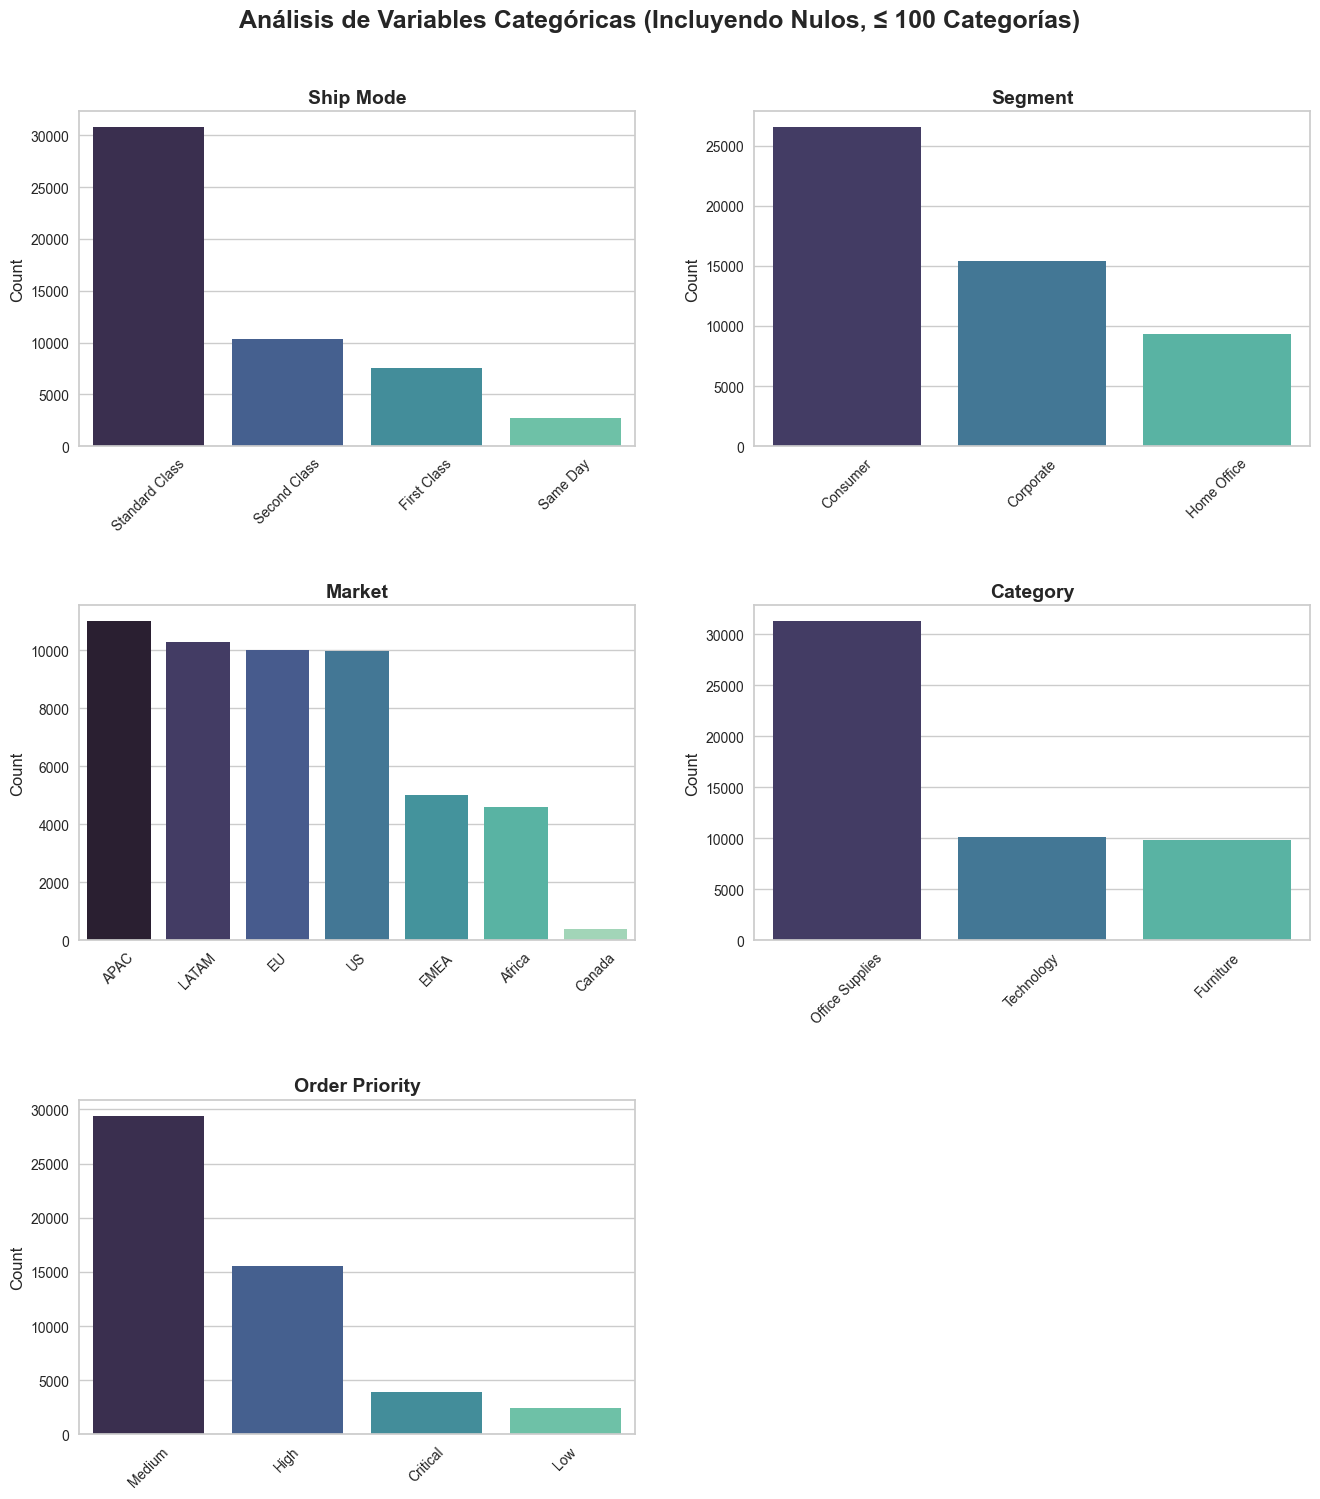

In [7]:
sp.plot_categoricas(df,max_categories=100) 

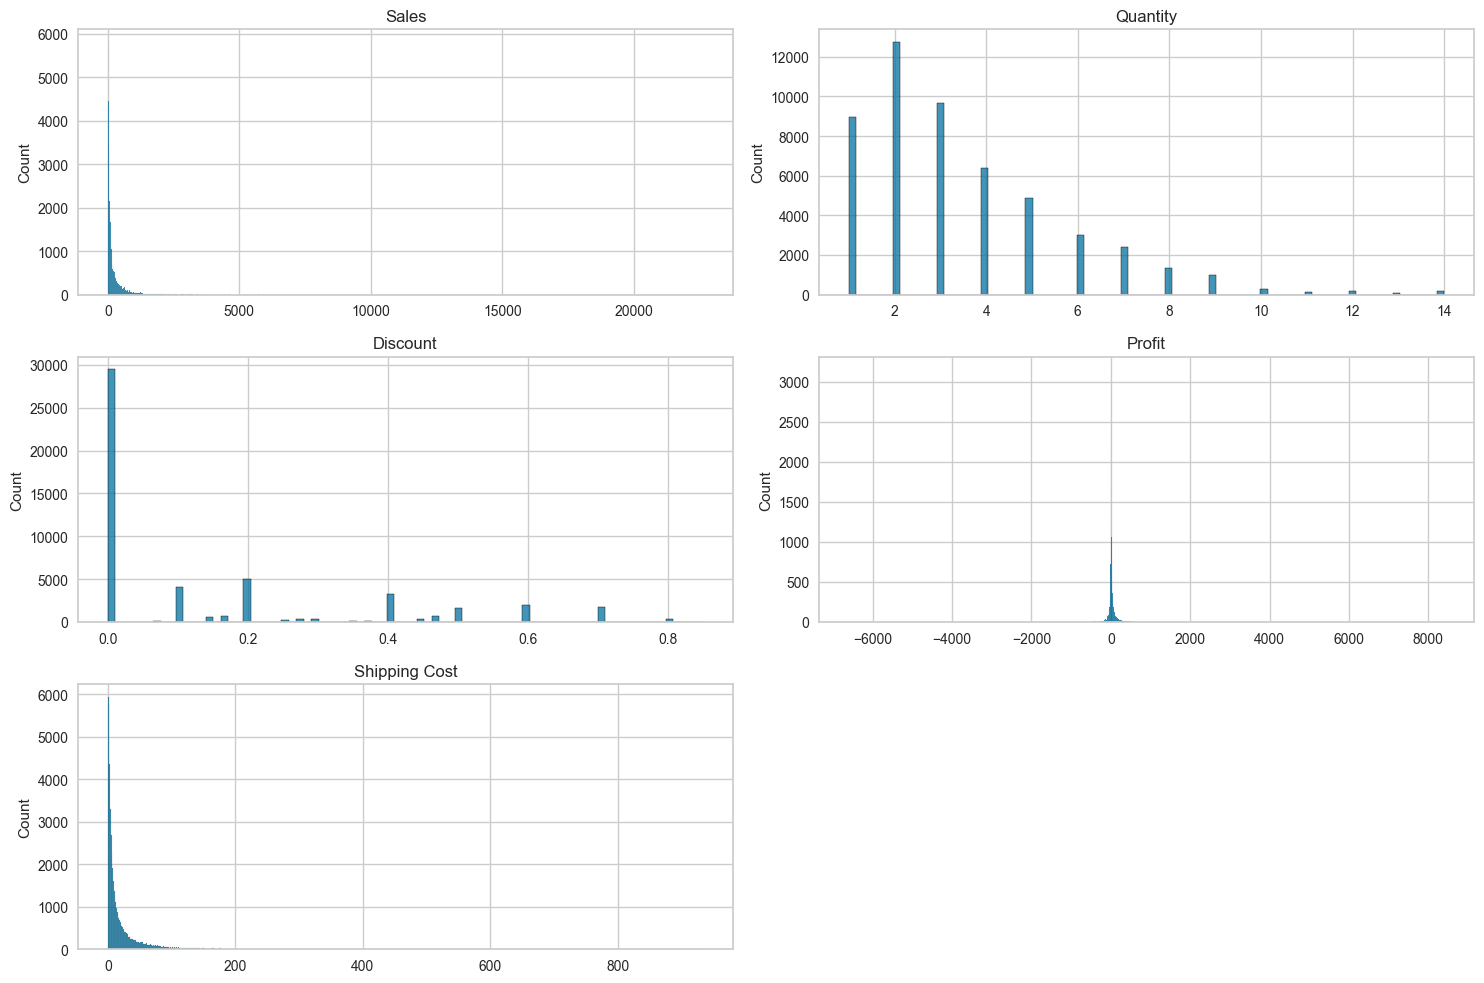

In [8]:
sp.plot_numericas(df)

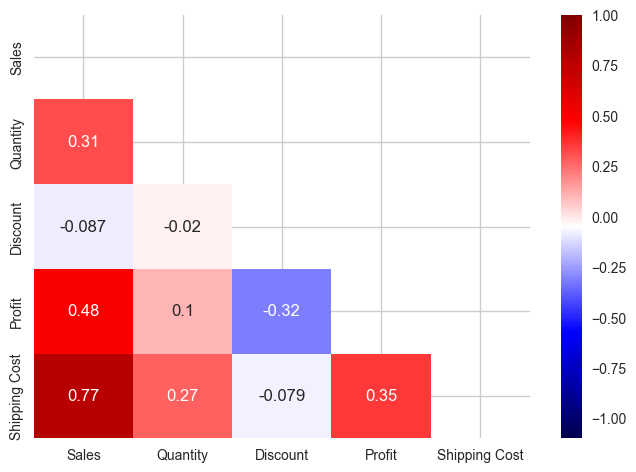

<Figure size 1000x1500 with 0 Axes>

In [9]:
sp.matriz_correlacion(df)

# Gestión de nulos

In [10]:
# Vemos la cantidad actual que tenemos de nan
print(df.isnull().sum())

Ship Mode         0
Segment           0
Market            0
Category          0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


In [11]:
# Vemos la cantidad total
df.isnull().sum().sum()

np.int64(0)

In [12]:
df.shape

(51290, 10)

# Gestion de Outiers

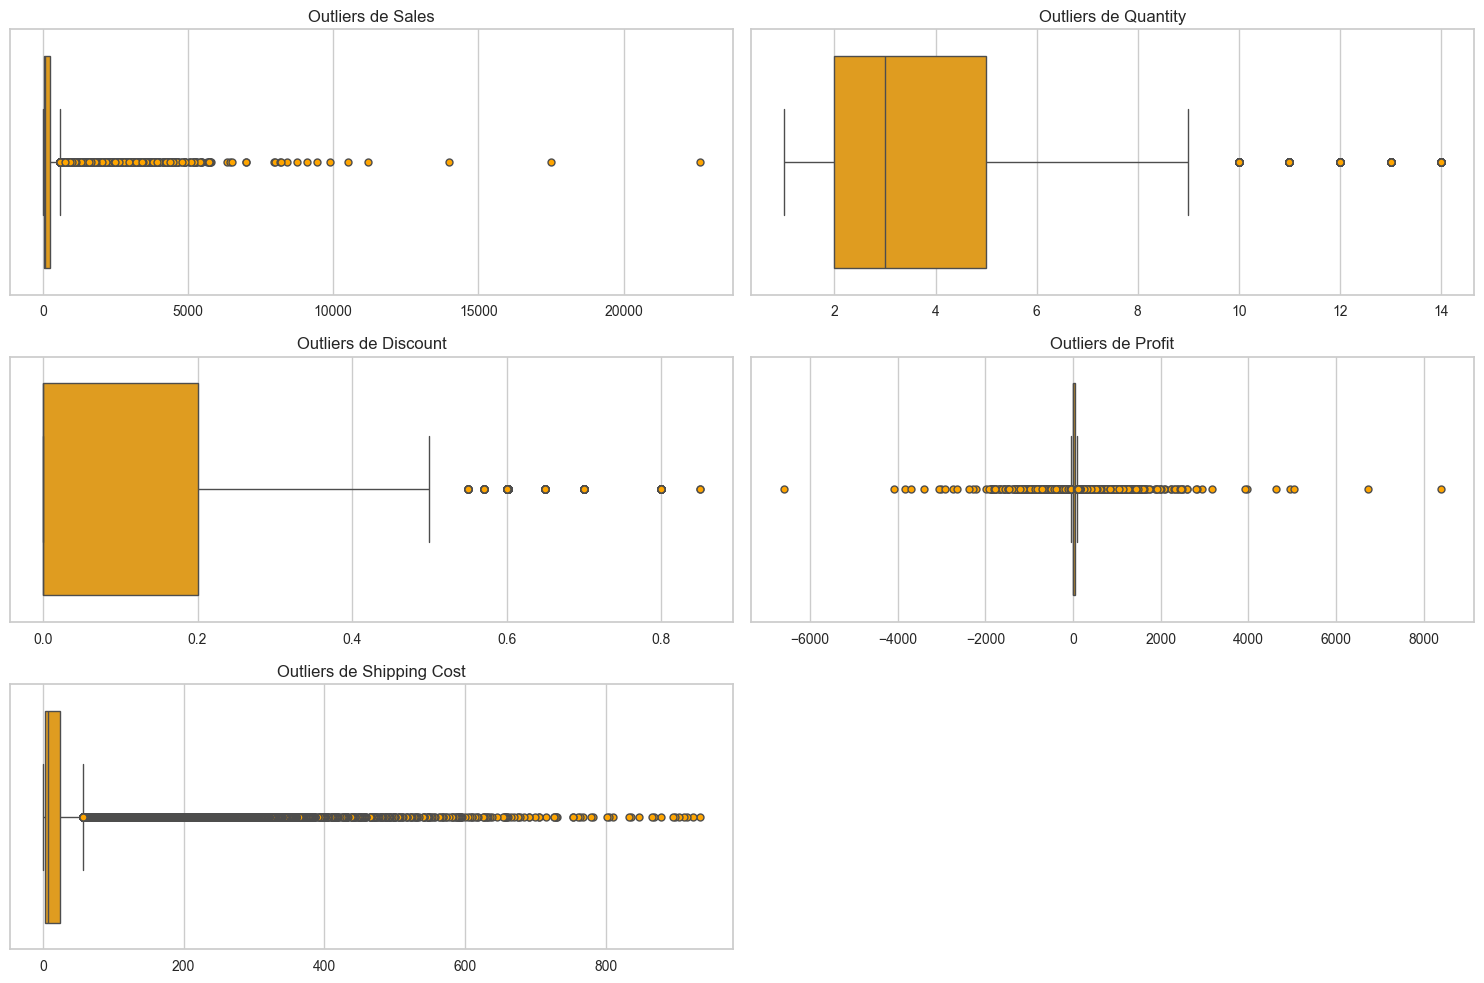

In [13]:
sp.detectar_outliers(df)

In [14]:
df.head(1)

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Same Day,Consumer,US,Technology,2309.65,7,0.0,762.1845,933.57,Critical


In [15]:
col_numericas=df.select_dtypes(include=np.number).columns
lista_vecinos=[5, 10, 20, 50]
list_contaminacion = [0.01, 0.05, 0.1]

df_lof = df.copy()
df_lof = sp.gestion_nulos_lof(df_lof, col_numericas, lista_vecinos, list_contaminacion)

Aplicando LOF con diferentes parámetros: 100%|██████████| 12/12 [00:04<00:00,  2.74it/s]


In [16]:
df_lof.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570
outliers_lof_5_0.01,51290.0,0.979996,0.199019,-1.000,1.000000,1.000,1.0000,1.000
outliers_lof_5_0.05,51290.0,0.899981,0.435934,-1.000,1.000000,1.000,1.0000,1.000
outliers_lof_5_0.1,51290.0,0.800000,0.600006,-1.000,1.000000,1.000,1.0000,1.000
outliers_lof_10_0.01,51290.0,0.979996,0.199019,-1.000,1.000000,1.000,1.0000,1.000
outliers_lof_10_0.05,51290.0,0.899981,0.435934,-1.000,1.000000,1.000,1.0000,1.000


In [17]:
col_numericas

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')

In [18]:
combinaciones_variables = list(combinations(col_numericas, 2))
columnas_hue = df_lof.filter(like="outlier").columns

In [19]:
# sp.scatterplot_outliers(df_lof,combinaciones_variables,columnas_hue)

In [20]:
cantidad = 5
df_filtrado = df_lof[(df_lof == -1).sum(axis=1) > cantidad]
df_filtrado.shape

(1795, 22)

In [21]:
df_filtrado.head()

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,outliers_lof_5_0.01,outliers_lof_5_0.05,outliers_lof_5_0.1,outliers_lof_10_0.01,outliers_lof_10_0.05,outliers_lof_10_0.1,outliers_lof_20_0.01,outliers_lof_20_0.05,outliers_lof_20_0.1,outliers_lof_50_0.01,outliers_lof_50_0.05,outliers_lof_50_0.1
0,Same Day,Consumer,US,Technology,2309.650,7,0.0,762.1845,933.57,Critical,1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
1,Second Class,Corporate,APAC,Furniture,3709.395,9,0.1,-288.7650,923.63,Critical,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,First Class,Home Office,EU,Technology,2892.510,5,0.1,-96.5400,910.16,Medium,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,Same Day,Consumer,Africa,Technology,2832.960,8,0.0,311.5200,903.04,Critical,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
5,Second Class,Corporate,APAC,Technology,2862.675,5,0.1,763.2750,897.35,Critical,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [22]:
df_final=df.drop(index = df_filtrado.index).reset_index(drop=True)

In [23]:
df.shape

(51290, 10)

In [24]:
# df final para crear modelos
df_final.shape

(49495, 10)

In [25]:
df_final.head()

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.971,915.49,Medium
1,Standard Class,Consumer,APAC,Furniture,5244.840,6,0.0,996.480,878.38,High
2,Standard Class,Corporate,US,Office Supplies,5083.960,5,0.2,1906.485,867.69,Low
3,First Class,Corporate,APAC,Furniture,4626.150,5,0.0,647.550,835.57,High
4,Same Day,Home Office,LATAM,Furniture,2221.800,7,0.0,622.020,810.25,Critical


In [26]:
df_final=df_final.drop_duplicates()

In [27]:
df_final.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,49491.000000,49491.000000,49491.000000,49491.000000,49491.000000
mean,240.527764,3.398194,0.140346,29.474367,25.158198
std,433.836236,2.173184,0.210469,144.666960,51.590106
min,0.836000,1.000000,0.000000,-1869.876000,0.000000
25%,31.121000,2.000000,0.000000,0.000000,2.650000
50%,85.680000,3.000000,0.000000,9.480000,7.850000
75%,251.256000,5.000000,0.200000,37.358000,24.370000
max,5751.540000,14.000000,0.800000,2817.990000,915.490000


In [28]:
df_final.dtypes

Ship Mode          object
Segment            object
Market             object
Category           object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

# Estandarización

In [29]:
# Selecciona solo las columnas numéricas
numeric_columns = df_final.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')

In [30]:
escalador_robust = RobustScaler()
suffix = "_robust"

# Aplica el escalador a las columnas numéricas
datos_transf_robust = escalador_robust.fit_transform(df_final[numeric_columns])

# Crea un DataFrame con las columnas escaladas y el sufijo
df_scaled_robust = pd.DataFrame(datos_transf_robust, columns=[col + suffix for col in numeric_columns], index=df_final.index)

# Añade las nuevas columnas escaladas al DataFrame original
df_rob = pd.concat([df_final, df_scaled_robust], axis=1)
df_rob.head(1)

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales_robust,Quantity_robust,Discount_robust,Profit_robust,Shipping Cost_robust
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.971,915.49,Medium,23.119863,2.0,0.5,24.372049,41.788214


In [31]:
escalador_minmax = MinMaxScaler()
suffix = "_minmax"

# Aplica el escalador a las columnas numéricas
datos_transf_minmax = escalador_minmax.fit_transform(df_final[numeric_columns])

# Crea un DataFrame con las columnas escaladas y el sufijo
df_scaled_minmax = pd.DataFrame(datos_transf_minmax, columns=[col + suffix for col in numeric_columns], index=df_final.index)

# Añade las nuevas columnas escaladas al DataFrame original
df_min = pd.concat([df_final, df_scaled_minmax], axis=1)
df_min.head(1)

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales_minmax,Quantity_minmax,Discount_minmax,Profit_minmax,Shipping Cost_minmax
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.971,915.49,Medium,0.899774,0.615385,0.125,0.595121,1.0


In [32]:
escalador_stds = StandardScaler()
suffix = "_stds"

# Aplica el escalador a las columnas numéricas
datos_transfr_stds = escalador_stds.fit_transform(df_final[numeric_columns])

# Crea un DataFrame con las columnas escaladas y el sufijo
df_scaled_stds = pd.DataFrame(datos_transfr_stds, columns=[col + suffix for col in numeric_columns], index=df_final.index)

# Añade las nuevas columnas escaladas al DataFrame original
df_std = pd.concat([df_final, df_scaled_stds], axis=1)
df_std.head(1)

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Sales_stds,Quantity_stds,Discount_stds,Profit_stds,Shipping Cost_stds
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.971,915.49,Medium,11.374553,2.577722,-0.191696,6.155556,17.257976


In [33]:
df_list=[df_rob,df_std,df_min]

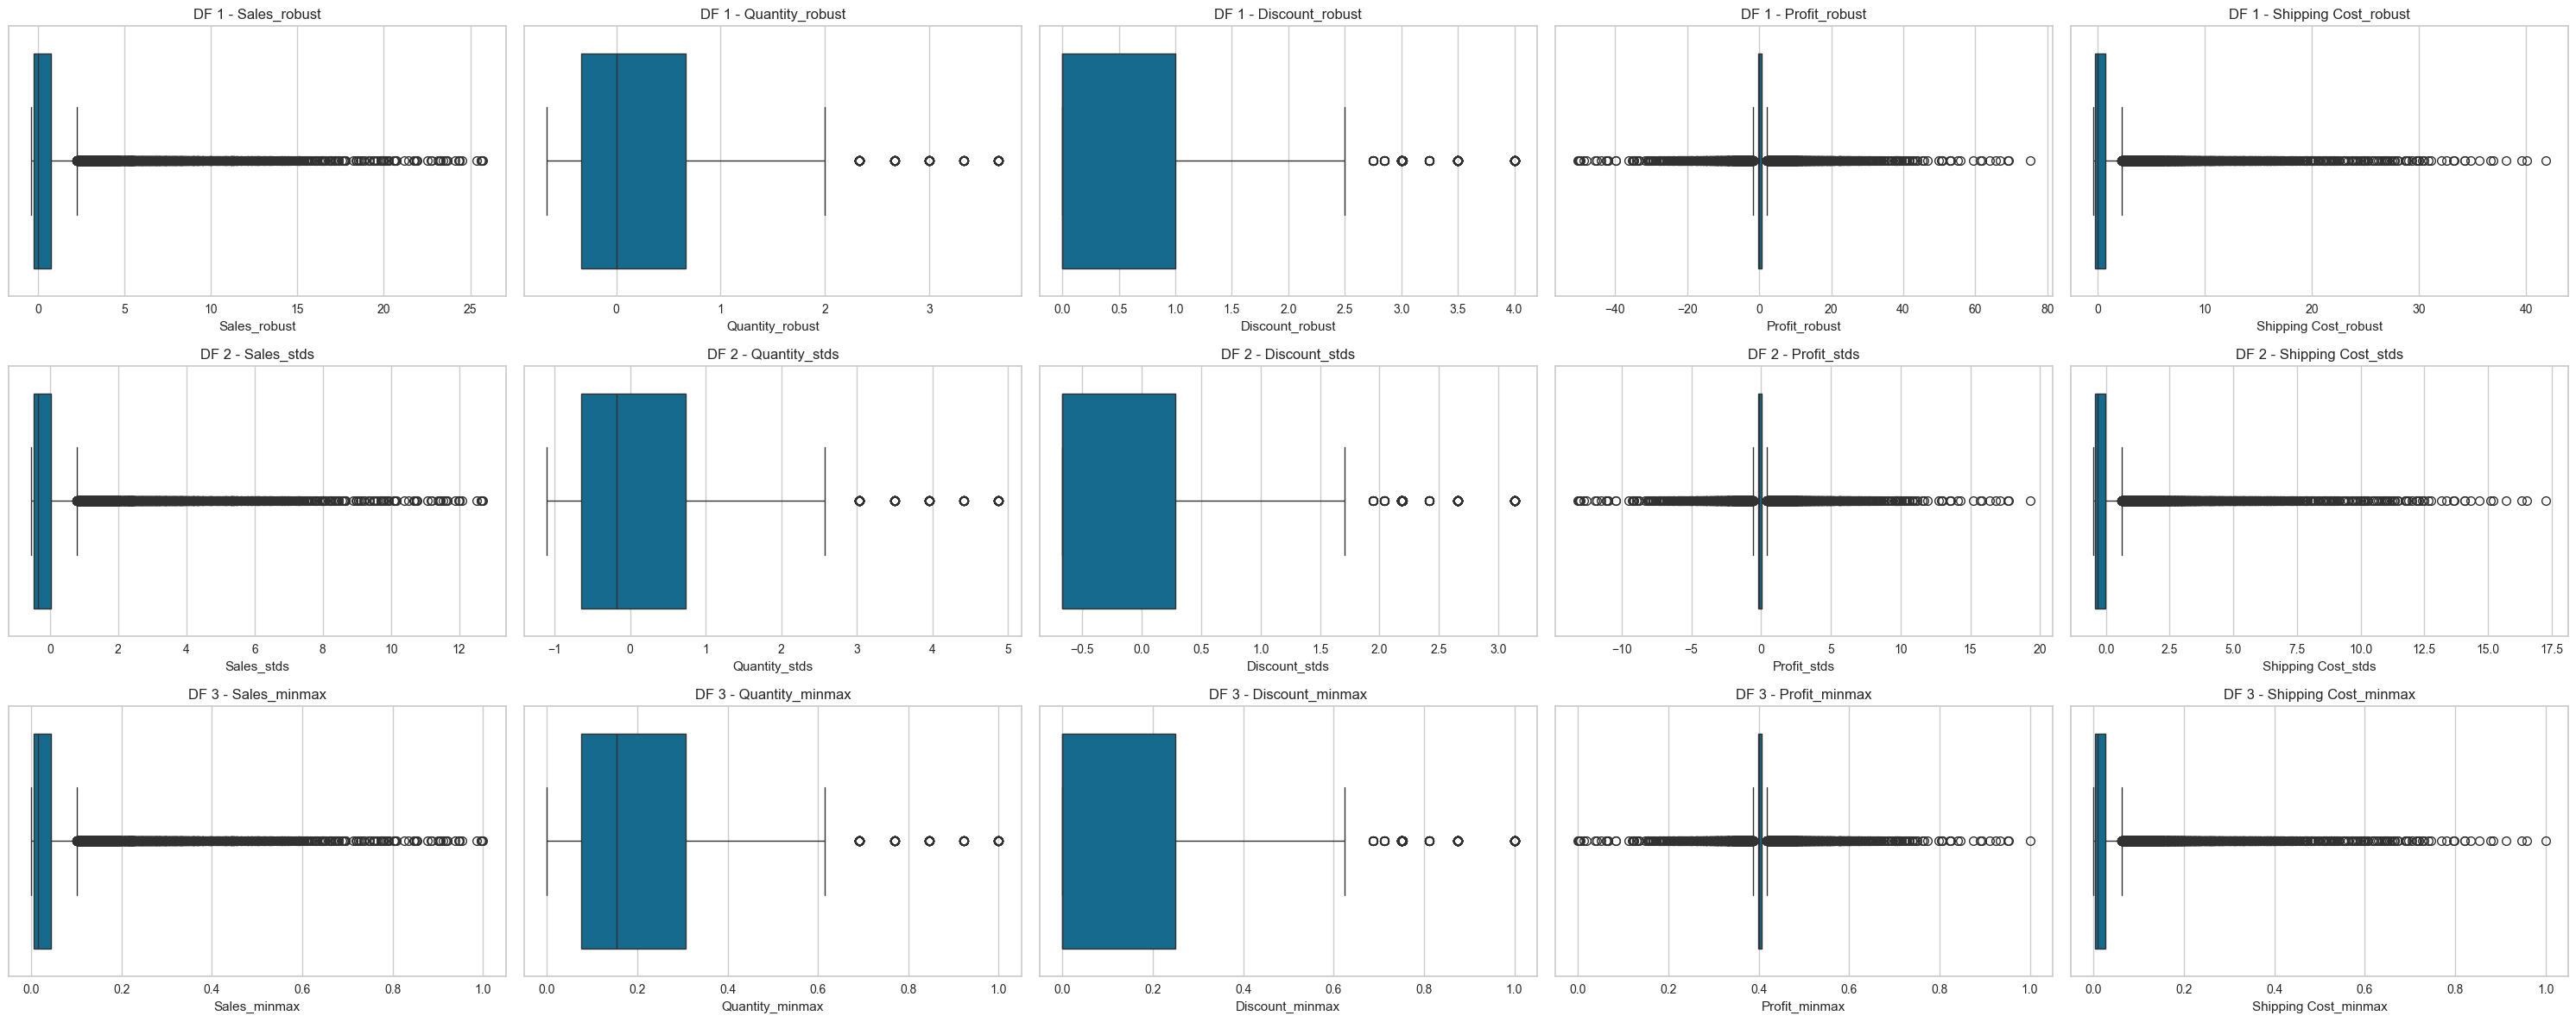

In [34]:
sp.generador_boxplots(df_list)

Una vez realizado la estandarizacion se opta por utilizar el metodo "Stds" para dar peso a los pocos outiers que hemos podido dejar en la muestra y que se tengan en cuenta en el modelo

In [35]:
df_final.head()

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.971,915.49,Medium
1,Standard Class,Consumer,APAC,Furniture,5244.840,6,0.0,996.480,878.38,High
2,Standard Class,Corporate,US,Office Supplies,5083.960,5,0.2,1906.485,867.69,Low
3,First Class,Corporate,APAC,Furniture,4626.150,5,0.0,647.550,835.57,High
4,Same Day,Home Office,LATAM,Furniture,2221.800,7,0.0,622.020,810.25,Critical


In [36]:
df_estandarizado = pd.concat([df_final, df_scaled_stds], axis=1)
df_estandarizado=df_estandarizado.drop(columns=numeric_columns)

In [37]:
df_estandarizado.sample(5)

,Ship Mode,Segment,Market,Category,Order Priority,Sales_stds,Quantity_stds,Discount_stds,Profit_stds,Shipping Cost_stds
5267,Standard Class,Consumer,EU,Technology,High,0.766846,-0.183232,-0.666830,0.746865,0.674008
24743,Standard Class,Consumer,US,Office Supplies,High,-0.373826,0.737086,-0.666830,0.050808,-0.335498
32496,Standard Class,Corporate,US,Furniture,Medium,0.011798,-0.183232,-0.191696,-0.147141,-0.408769
38080,Second Class,Consumer,LATAM,Office Supplies,Medium,-0.493435,-0.183232,-0.666830,-0.200424,-0.441139
35091,Standard Class,Corporate,LATAM,Furniture,Medium,-0.414685,-0.183232,1.233706,-0.140948,-0.425245


# Encoding

In [38]:
df_estandarizado.dtypes

Ship Mode              object
Segment                object
Market                 object
Category               object
Order Priority         object
Sales_stds            float64
Quantity_stds         float64
Discount_stds         float64
Profit_stds           float64
Shipping Cost_stds    float64
dtype: object

In [39]:
lista_col_categ = df_estandarizado.select_dtypes(include="O").columns.tolist()
lista_col_categ

['Ship Mode', 'Segment', 'Market', 'Category', 'Order Priority']

In [40]:
lista_col_num = df_estandarizado.select_dtypes(include=np.number).columns.tolist()
lista_col_num

['Sales_stds',
 'Quantity_stds',
 'Discount_stds',
 'Profit_stds',
 'Shipping Cost_stds']

In [41]:
df_estandarizado.head()

,Ship Mode,Segment,Market,Category,Order Priority,Sales_stds,Quantity_stds,Discount_stds,Profit_stds,Shipping Cost_stds
0,First Class,Consumer,APAC,Technology,Medium,11.374553,2.577722,-0.191696,6.155556,17.257976
1,Standard Class,Consumer,APAC,Furniture,High,11.535142,1.197245,-0.666830,6.684425,16.538644
2,Standard Class,Corporate,US,Office Supplies,Low,11.164308,0.737086,0.283438,12.974833,16.331432
3,First Class,Corporate,APAC,Furniture,High,10.109037,0.737086,-0.666830,4.272447,15.708826
4,Same Day,Home Office,LATAM,Furniture,Critical,4.566913,1.657404,-0.666830,4.095971,15.218029


In [42]:
df_estandarizado.nunique()

Ship Mode                 4
Segment                   3
Market                    7
Category                  3
Order Priority            4
Sales_stds            22359
Quantity_stds            14
Discount_stds            26
Profit_stds           23747
Shipping Cost_stds     9740
dtype: int64

In [43]:
df_estandarizado.dtypes

Ship Mode              object
Segment                object
Market                 object
Category               object
Order Priority         object
Sales_stds            float64
Quantity_stds         float64
Discount_stds         float64
Profit_stds           float64
Shipping Cost_stds    float64
dtype: object

In [44]:
df_estandarizado.shape

(49491, 10)

In [45]:
columnas_numericas=df_estandarizado.select_dtypes(include=np.number).columns
columnas_numericas

Index(['Sales_stds', 'Quantity_stds', 'Discount_stds', 'Profit_stds',
       'Shipping Cost_stds'],
      dtype='object')

In [46]:
print(df['Ship Mode'].value_counts())

Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64


In [47]:
df.groupby('Ship Mode')['Shipping Cost'].mean().sort_values()

Ship Mode
Standard Class    19.971755
Second Class      30.469747
First Class       41.053065
Same Day          42.937453
Name: Shipping Cost, dtype: float64

In [48]:
df.groupby('Ship Mode')['Shipping Cost'].median().sort_values()

Ship Mode
Standard Class     6.34
Second Class       8.95
Same Day          12.34
First Class       12.82
Name: Shipping Cost, dtype: float64

In [49]:
# One-Hot Encoding para variables sin orden
one_hot_columns = ['Segment', 'Market', 'Category']
data_one_hot = pd.get_dummies(df_estandarizado[one_hot_columns], drop_first=False).astype(int) 

# Definir el mapeo manual para los modos de envio
order_ship_mapping = {
    'Standard Class': 0,
    'Second Class': 1,
    'First Class': 2,
    'Same Day': 2}

# Aplicar el mapeo a la columna 'Order Priority'
df_estandarizado['Ship Mode'] = df_estandarizado['Ship Mode'].map(order_ship_mapping)


order_priority_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Critical': 3}

# Aplicar el mapeo a la columna 'Order Priority'
df_estandarizado['Order Priority'] = df_estandarizado['Order Priority'].map(order_priority_mapping)

# Combinar todo
data_encoded = pd.concat([data_one_hot, df_estandarizado],axis=1)
data_encoded.drop(columns=one_hot_columns, inplace=True)

# Mostrar resultado
data_encoded


,Segment_Consumer,Segment_Corporate,Segment_Home Office,Market_APAC,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,Category_Furniture,Category_Office Supplies,Category_Technology,Ship Mode,Order Priority,Sales_stds,Quantity_stds,Discount_stds,Profit_stds,Shipping Cost_stds
0,1,0,0,1,0,0,0,0,0,0,0,0,1,2,1,11.374553,2.577722,-0.191696,6.155556,17.257976
1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,2,11.535142,1.197245,-0.666830,6.684425,16.538644
2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,11.164308,0.737086,0.283438,12.974833,16.331432
3,0,1,0,1,0,0,0,0,0,0,1,0,0,2,2,10.109037,0.737086,-0.666830,4.272447,15.708826
4,0,0,1,0,0,0,0,0,1,0,1,0,0,2,3,4.566913,1.657404,-0.666830,4.095971,15.218029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49490,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,-0.532270,-0.643391,2.659108,-0.350065,-0.487273
49491,0,0,1,0,0,0,1,0,0,0,0,1,0,2,1,-0.475760,1.197245,2.183974,-0.546408,-0.487273
49492,0,1,0,1,0,0,0,0,0,0,0,1,0,2,2,-0.492328,-0.643391,-0.666830,-0.190884,-0.487467
49493,0,1,0,1,0,0,0,0,0,0,0,1,0,2,1,-0.404368,0.737086,-0.666830,-0.172635,-0.487467


In [50]:
data_encoded.to_csv("../results/data_encoded.csv")

# Clustering

In [51]:
cluster=sc.Clustering(data_encoded)

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not

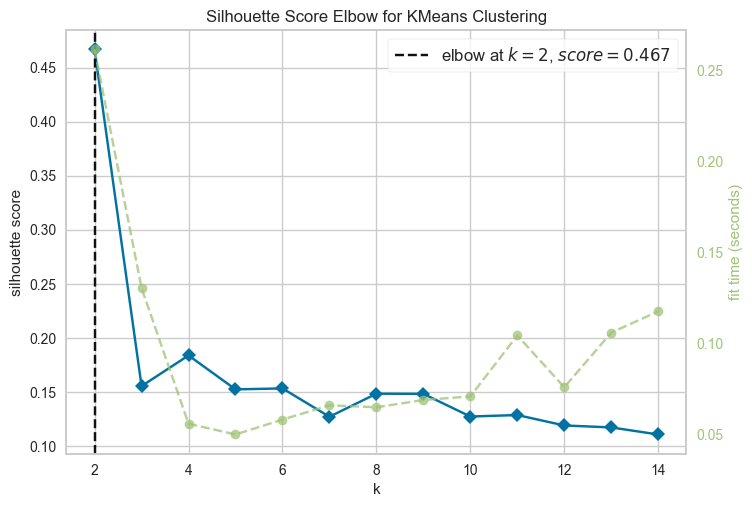

In [52]:
cluster.sacar_clusters_kmeans(n_clusters=(2, 15))

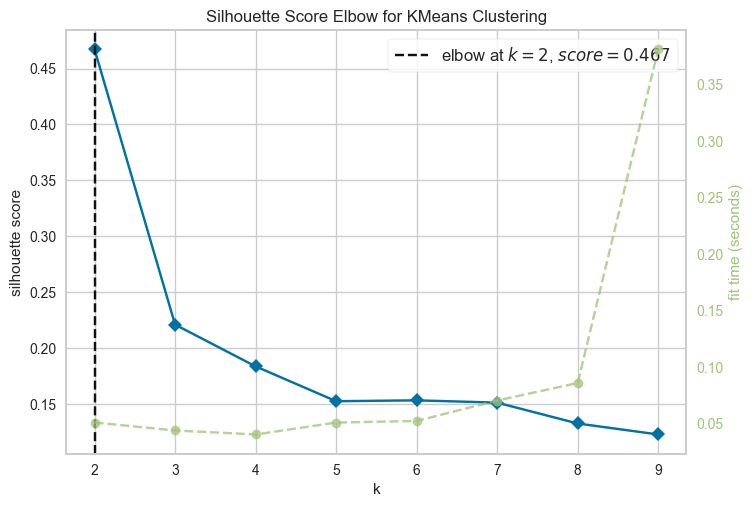

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [55]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(data_encoded)
visualizer.show()

In [61]:
df_clusters=cluster.modelo_kmeans(df_final,2)

In [62]:
df_clusters

(            Ship Mode      Segment  Market         Category     Sales  \
 0         First Class     Consumer    APAC       Technology  5175.171   
 1      Standard Class     Consumer    APAC        Furniture  5244.840   
 2      Standard Class    Corporate      US  Office Supplies  5083.960   
 3         First Class    Corporate    APAC        Furniture  4626.150   
 4            Same Day  Home Office   LATAM        Furniture  2221.800   
 ...               ...          ...     ...              ...       ...   
 49490  Standard Class    Corporate  Africa  Office Supplies     9.612   
 49491     First Class  Home Office    EMEA  Office Supplies    34.128   
 49492        Same Day    Corporate    APAC  Office Supplies    26.940   
 49493        Same Day    Corporate    APAC  Office Supplies    65.100   
 49494    Second Class     Consumer   LATAM  Office Supplies    61.380   
 
        Quantity  Discount    Profit  Shipping Cost Order Priority  \
 0             9       0.1   919.971    

In [54]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import distance_metric, type_metric
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# Lista de métricas de distancia a evaluar
metricas = ['euclidean', 'manhattan']
n_clusters_range = range(2, 7)  # Probar con 3, 4 y 5 clusters

# Diccionario para guardar resultados
resultados = {'métrica': [], 'modelo': [], 'silhouette_score': [], 'clusters': []}

# Probar KMeans y KMedoids con diferentes métricas y números de clusters
for metrica in metricas:
    for n_clusters in n_clusters_range:
        # KMeans
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data_encoded)
        labels_kmeans = kmeans.labels_
        sil_kmeans = silhouette_score(data_encoded, labels_kmeans, metric='euclidean')
        resultados['métrica'].append('euclidean')  # KMeans siempre usa euclidean
        resultados['modelo'].append('KMeans')
        resultados['silhouette_score'].append(sil_kmeans)
        resultados['clusters'].append(n_clusters)

        # KMedoids
        # Definir la métrica para pyclustering
        if metrica == 'euclidean':
            metric = distance_metric(type_metric.EUCLIDEAN)
        elif metrica == 'manhattan':
            metric = distance_metric(type_metric.MANHATTAN)

        # Crear instancias de KMedoids
        initial_medoids = list(range(n_clusters))  # Inicializar con índices de las primeras muestras
        kmedoids_instance = kmedoids(data_encoded.tolist(), initial_medoids, metric=metric)
        kmedoids_instance.process()
        labels_kmedoids = kmedoids_instance.predict(data_encoded.tolist())

        # Calcular índice de silueta para KMedoids
        try:
            sil_kmedoids = silhouette_score(data_encoded, labels_kmedoids, metric='euclidean')
        except ValueError:
            sil_kmedoids = None
        resultados['métrica'].append(metrica)
        resultados['modelo'].append('KMedoids')
        resultados['silhouette_score'].append(sil_kmedoids)
        resultados['clusters'].append(n_clusters)

# Convertir resultados a DataFrame
resultados_df = pd.DataFrame(resultados)

# Mostrar los mejores resultados
resultados_df.sort_values(by='silhouette_score', ascending=False, inplace=True)
resultados_df


AttributeError: 'DataFrame' object has no attribute 'tolist'

In [ ]:
kmeans = KMeans(n_clusters=2)
km_fit = kmeans.fit(df_encoding2)
labels = km_fit.labels_
df_kmeans = df_encoding2.copy()
df_kmeans["cluster"] = labels
df_kmeans.reset_index(inplace=True)
df_kmeans.sample(5)

NameError: name 'df_encoding2' is not defined

In [ ]:
silhouette = silhouette_score(df_kmeans.iloc[:,1: ], labels)
davies_bouldin = davies_bouldin_score(df_kmeans.iloc[:,1: ], labels)

unique, counts = np.unique(labels, return_counts=True)
cardinalidad = dict(zip(unique, counts))

df_metricas_kmeans = pd.DataFrame({
    "silhouette_score": silhouette,
    "davies_bouldin_index": davies_bouldin,
    "cardinalidad": [cardinalidad], 
    "modelo": "kmeans"
}, index = [0])

df_metricas_kmeans

In [ ]:
# Seleccionar todas las columnas excepto 'name' y agrupar por 'cluster'
columns_to_include = df_kmeans.columns.difference(['name'])  # Excluye 'name'
variables = columns_to_include.difference(['cluster'])  # Variables numéricas
cluster_means = df_kmeans.groupby('cluster')[variables].mean().reset_index()

# Crear el subplot dinámicamente
num_vars = len(variables)
fig, axes = plt.subplots(
    nrows=2, 
    ncols=math.ceil(num_vars / 2), 
    figsize=(20, 8), 
    sharey=False  # Permite escalas independientes
)
axes = axes.flat

# Generar un barplot para cada variable en un subplot
for i, variable in enumerate(variables):
    sns.barplot(
        data=cluster_means,
        x='cluster',
        y=variable,
        ax=axes[i],
        palette='coolwarm',
        edgecolor='black'
    )
    axes[i].set_title(f'{variable}', fontsize=14)
    axes[i].set_xlabel('Cluster', fontsize=12)
    axes[i].set_ylabel('Media', fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Ocultar subplots vacíos si num_vars no es múltiplo de las filas/columnas
if num_vars < len(axes):
    for j in range(num_vars, len(axes)):
        fig.delaxes(axes[j])

# Título general del gráfico
fig.suptitle('Media de Todas las Variables por Cluster', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
